<a href="https://colab.research.google.com/github/HaseebHussainMd/Projects/blob/main/YULU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

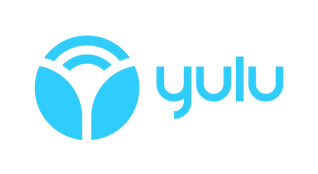

# **About Yulu :**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

# **Problem Statement :**
The objective is to identify the key variables that significantly predict the demand for these cycles and to evaluate how well these variables describe the fluctuations in demand within the Indian market. By analyzing these factors, Yulu aims to develop strategies to enhance usage, optimize operations, and ultimately increase revenue.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 23.5MB/s]


In [ ]:
df = pd.read_csv('bike_sharing.csv')

In [ ]:
df.shape #Number of rows and columns

(10886, 12)

In [ ]:
df.info() #Columns names and its datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.isna().sum() #checking for null/missing values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df[df.duplicated() == True] #checking for duplicates

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [ ]:
df.describe() #description of the data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime']) #Converting object to datetime data type

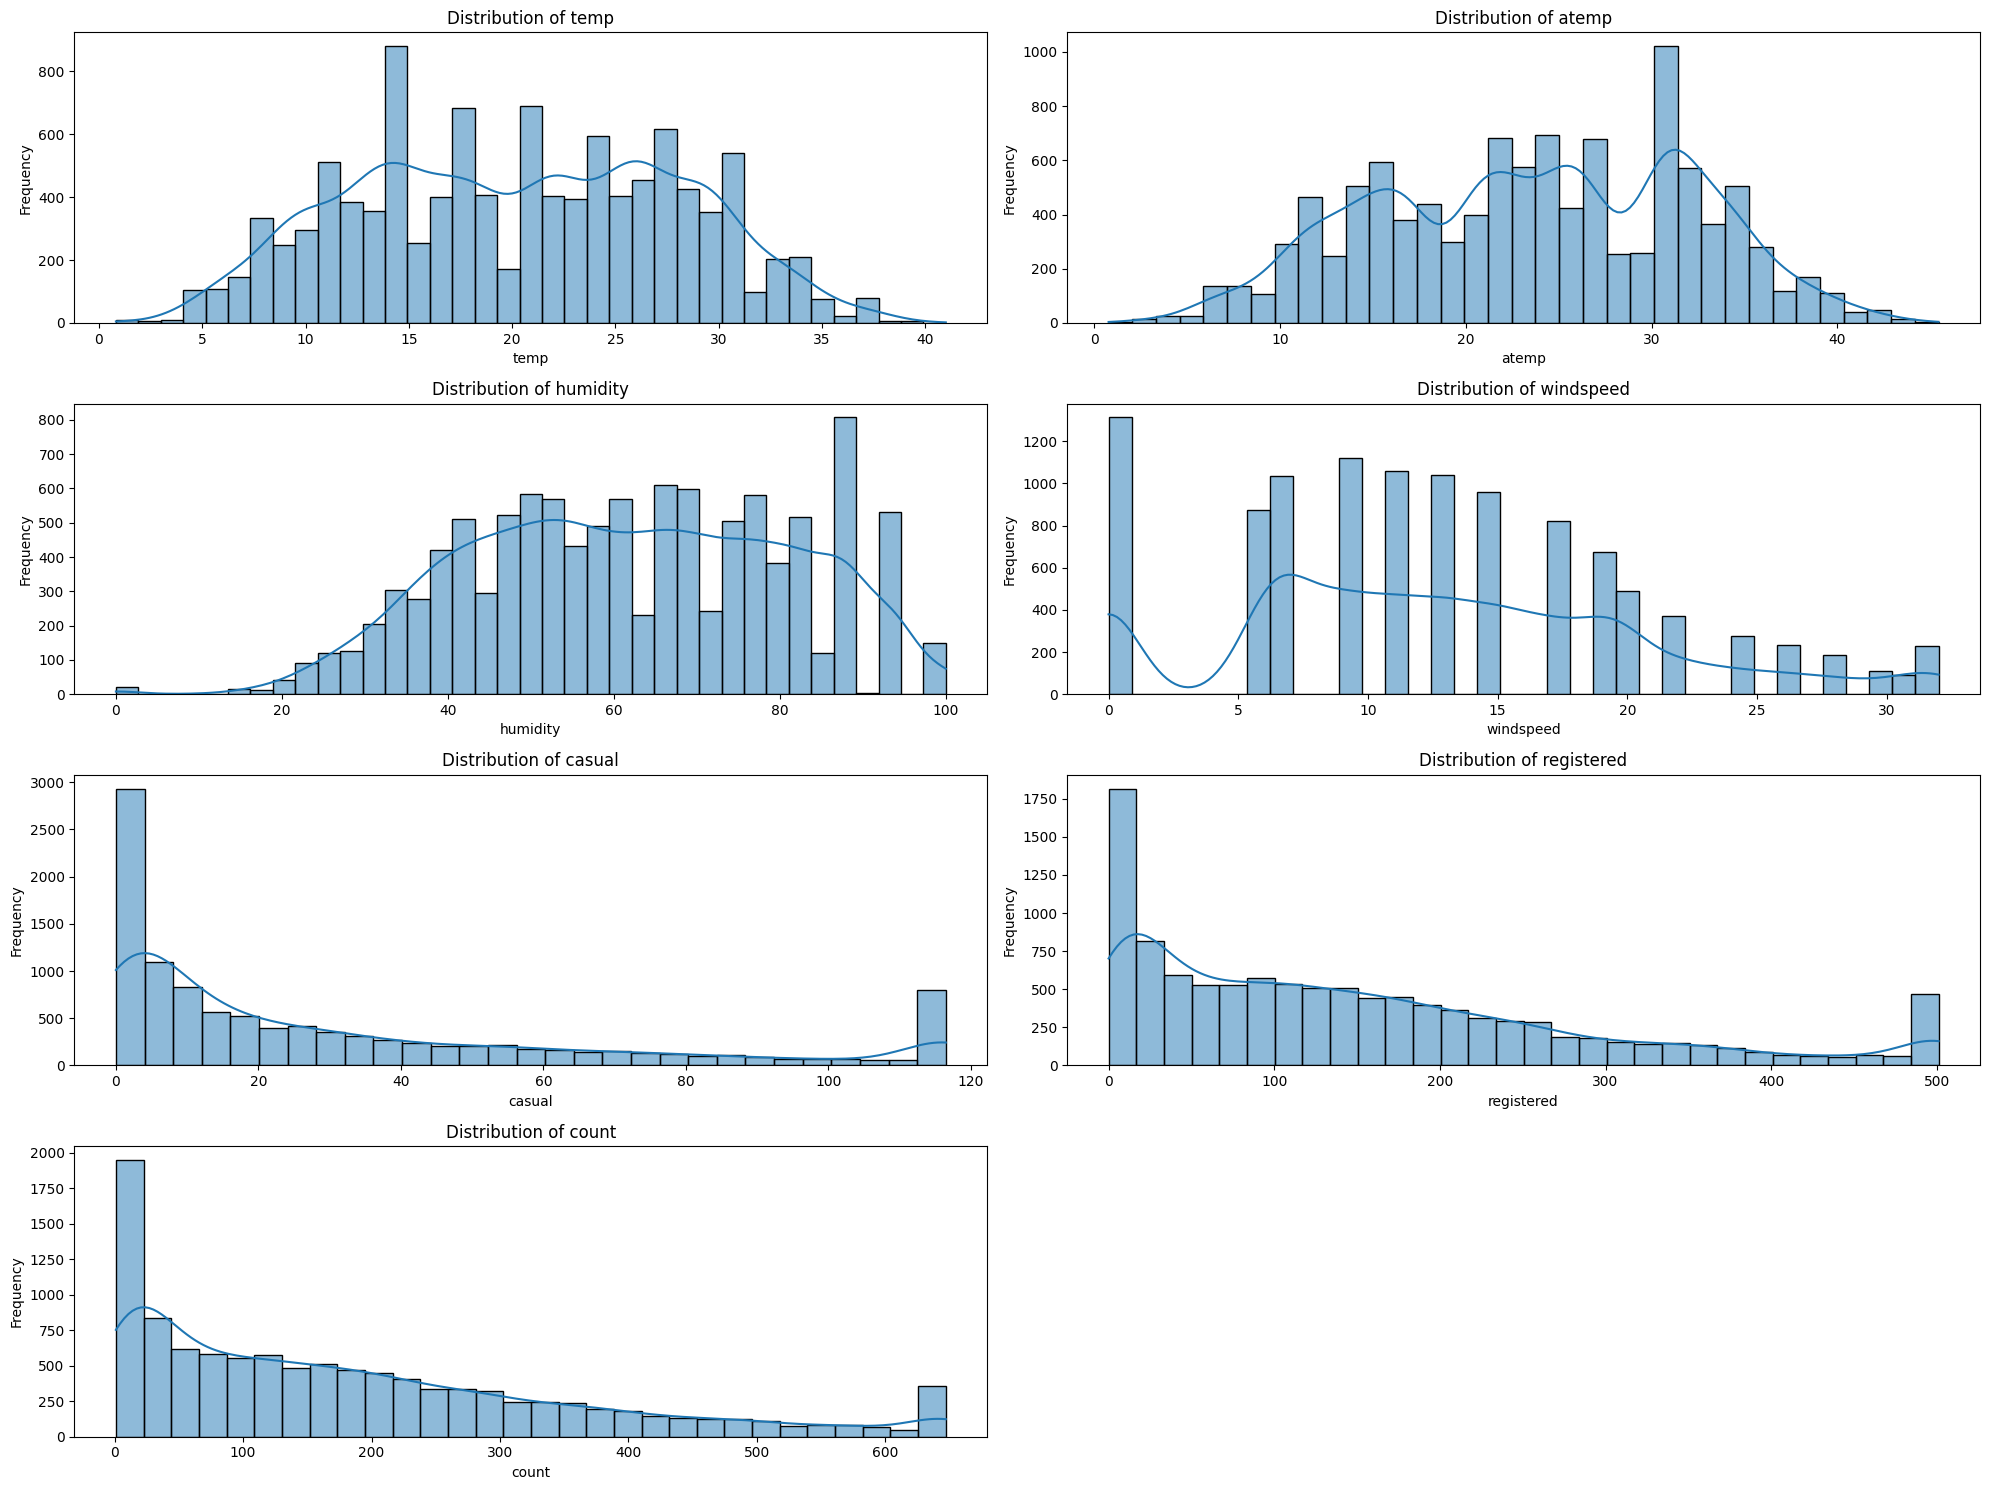

In [ ]:
# List of numerical features in our dataset
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(20, 15))

# Plot histograms and distplots
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **Insights :**
**1. Distribution of temp (Temperature) :**

The distribution of temperature appears to be roughly normal (bell-shaped), peaking around 20-25°C.

Slightly skewed to the right, indicating that there are more days with temperatures higher than the peak range.

Temperatures range from 0°C to around 40°C, with most values falling between 10°C and 30°C.

**2. Distribution of atemp (Feeling Temperature) :**

Similar to the temperature distribution, but it seems to peak slightly higher, around 25-30°C.

Slight right skew, indicating higher perceived temperatures are less common but present.

Ranges from 0°C to about 45°C, with a majority between 10°C and 35°C.

**3. Distribution of humidity :**

The distribution of humidity is fairly uniform, with slight peaks around 50% and 90%.

Slightly left-skewed, suggesting a small number of days with very low humidity.

Ranges from 0% to 100%, with most days having humidity between 40% and 90%.

**4. Distribution of windspeed :**

The windspeed distribution is heavily right-skewed, with a peak at the lower end.

Strong right skew, indicating most days have low wind speeds.

Windspeed ranges from 0 to 50, but the majority of values are below 20.

**5. Distribution of casual (Count of Casual Users) :**

The distribution of casual users is highly right-skewed, with a large peak at the low end.

Very strong right skew, showing that most days have a low number of casual users.

Counts range from 0 to around 350, but most days have fewer than 50 casual users.

**6. Distribution of registered (Count of Registered Users) :**

Similar to the casual users, the distribution of registered users is also right-skewed, but with a broader spread.

Right skewed, indicating more days with fewer registered users, but some days have a high count.

Ranges from 0 to about 800, with most days having fewer than 200 registered users.

**7. Distribution of count (Total Count of Rental Bikes) :**

The distribution of total bike rentals is right-skewed, with a large number of days having lower rental counts.

Strong right skew, reflecting that most days see lower bike rentals, but there are some days with high rentals.

Counts range from 0 to about 1000, with most values falling below 200.

<ipython-input-57-207d444b67e0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='datetime', y='count',palette = 'viridis', data=yearly_counts)
<ipython-input-57-207d444b67e0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='datetime', y='count',palette = 'viridis', data=Monthly_counts)


Text(0, 0.5, 'Total Count')

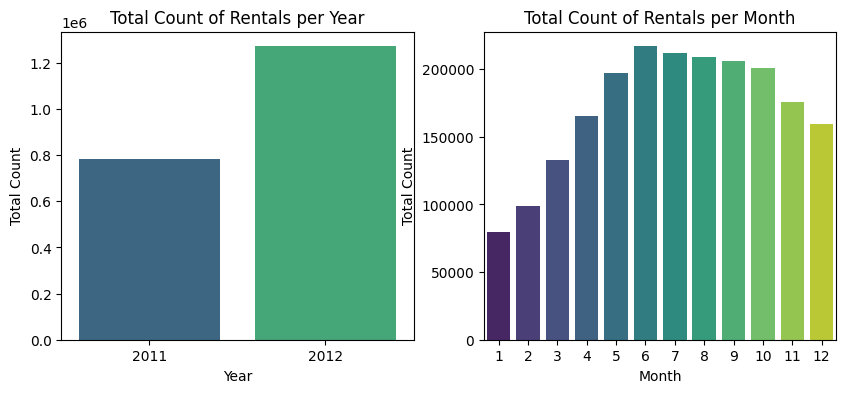

In [ ]:
yearly_counts = df.groupby(df['datetime'].dt.year)['count'].sum().reset_index()
Monthly_counts = df.groupby(df['datetime'].dt.month)['count'].sum().reset_index()

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.barplot(x='datetime', y='count',palette = 'viridis', data=yearly_counts)
plt.title('Total Count of Rentals per Year')
plt.xlabel('Year')
plt.ylabel('Total Count')


plt.subplot(1,2,2)
sns.barplot(x='datetime', y='count',palette = 'viridis', data=Monthly_counts)
plt.title('Total Count of Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Total Count')

**Insights :**

*  2012 has most number of users compared to 2011.
*  June is the peak month among all the other months.

In [ ]:
df['year_month'] = df['datetime'].dt.strftime('%Y-%m')

In [ ]:
year_month_count = df.groupby(['year_month',df['datetime'].dt.year,'season','holiday','workingday','weather'])['count'].sum().reset_index()

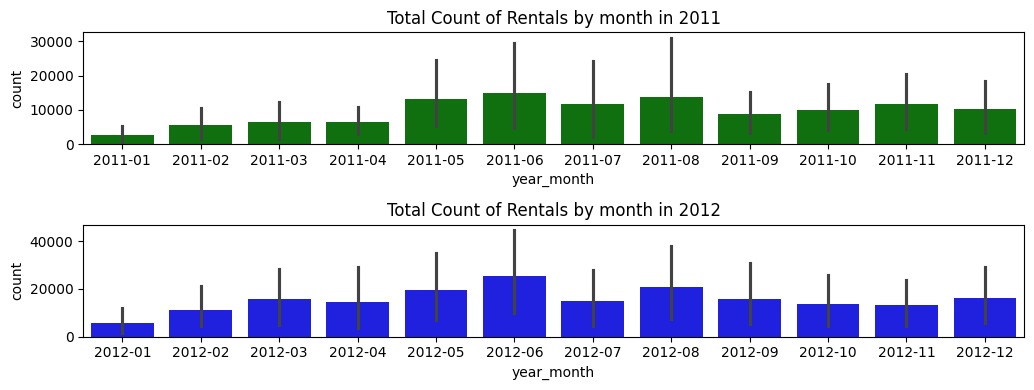

In [ ]:
plt.figure(figsize=(20, 4))
plt.subplot(2,2,1)
sns.barplot(x='year_month', y='count',color='g',data = year_month_count[year_month_count['datetime']==2011])
plt.title('Total Count of Rentals by month in 2011')

plt.subplot(2,2,3)
sns.barplot(x='year_month', y='count',color = 'Blue',data = year_month_count[year_month_count['datetime']==2012])
plt.title('Total Count of Rentals by month in 2012')

plt.tight_layout()

In [ ]:
season_counts = df.groupby('season')['count'].sum()
weather_counts = df.groupby('weather')['count'].sum()
workingday_counts = df.groupby('workingday')['count'].sum()
holiday_counts = df.groupby('holiday')['count'].sum()

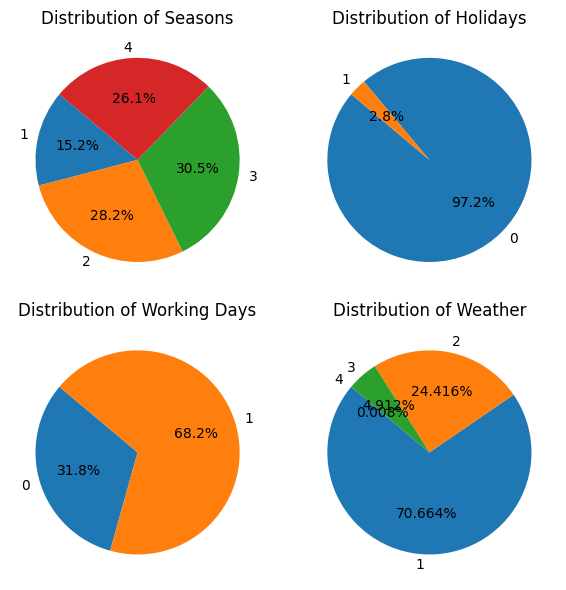

In [ ]:
plt.figure(figsize=(6, 6))
plt.subplot(2,2,1)
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Seasons')

plt.subplot(2,2,2)
plt.pie(holiday_counts, labels=holiday_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Holidays')

plt.subplot(2,2,3)
plt.pie(workingday_counts, labels=workingday_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Working Days')

plt.subplot(2,2,4)
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.3f%%', startangle=140)
plt.title('Distribution of Weather')


plt.tight_layout()

# **Insights :**

**Distribution of Seasons :**

Season 3 and Season 2 are the most popular seasons for bike rentals, likely due to more favorable weather conditions. Season 4 still sees significant usage, while spring has the least rentals, possibly due to early season 1(spring's) unpredictable weather.

**Distribution of Holidays :**

Bike rentals predominantly occur on non-holiday days, indicating that the service is more commonly used for daily commuting and regular activities rather than holiday leisure.

**Distribution of Working Days :**

The majority of bike rentals happen on working days, suggesting a significant use of the service for commuting purposes. However, there is still a notable portion (31.4%) of rentals on non-working days, indicating some leisure.

**Distribution of Weather:**

 Most bike rentals occur during Weather 1, which are more favorable for biking. Adverse weather conditions like heavy rain, thunderstorms, or snow (Weather 4) significantly reduce the number of rentals.

# **Outliers**

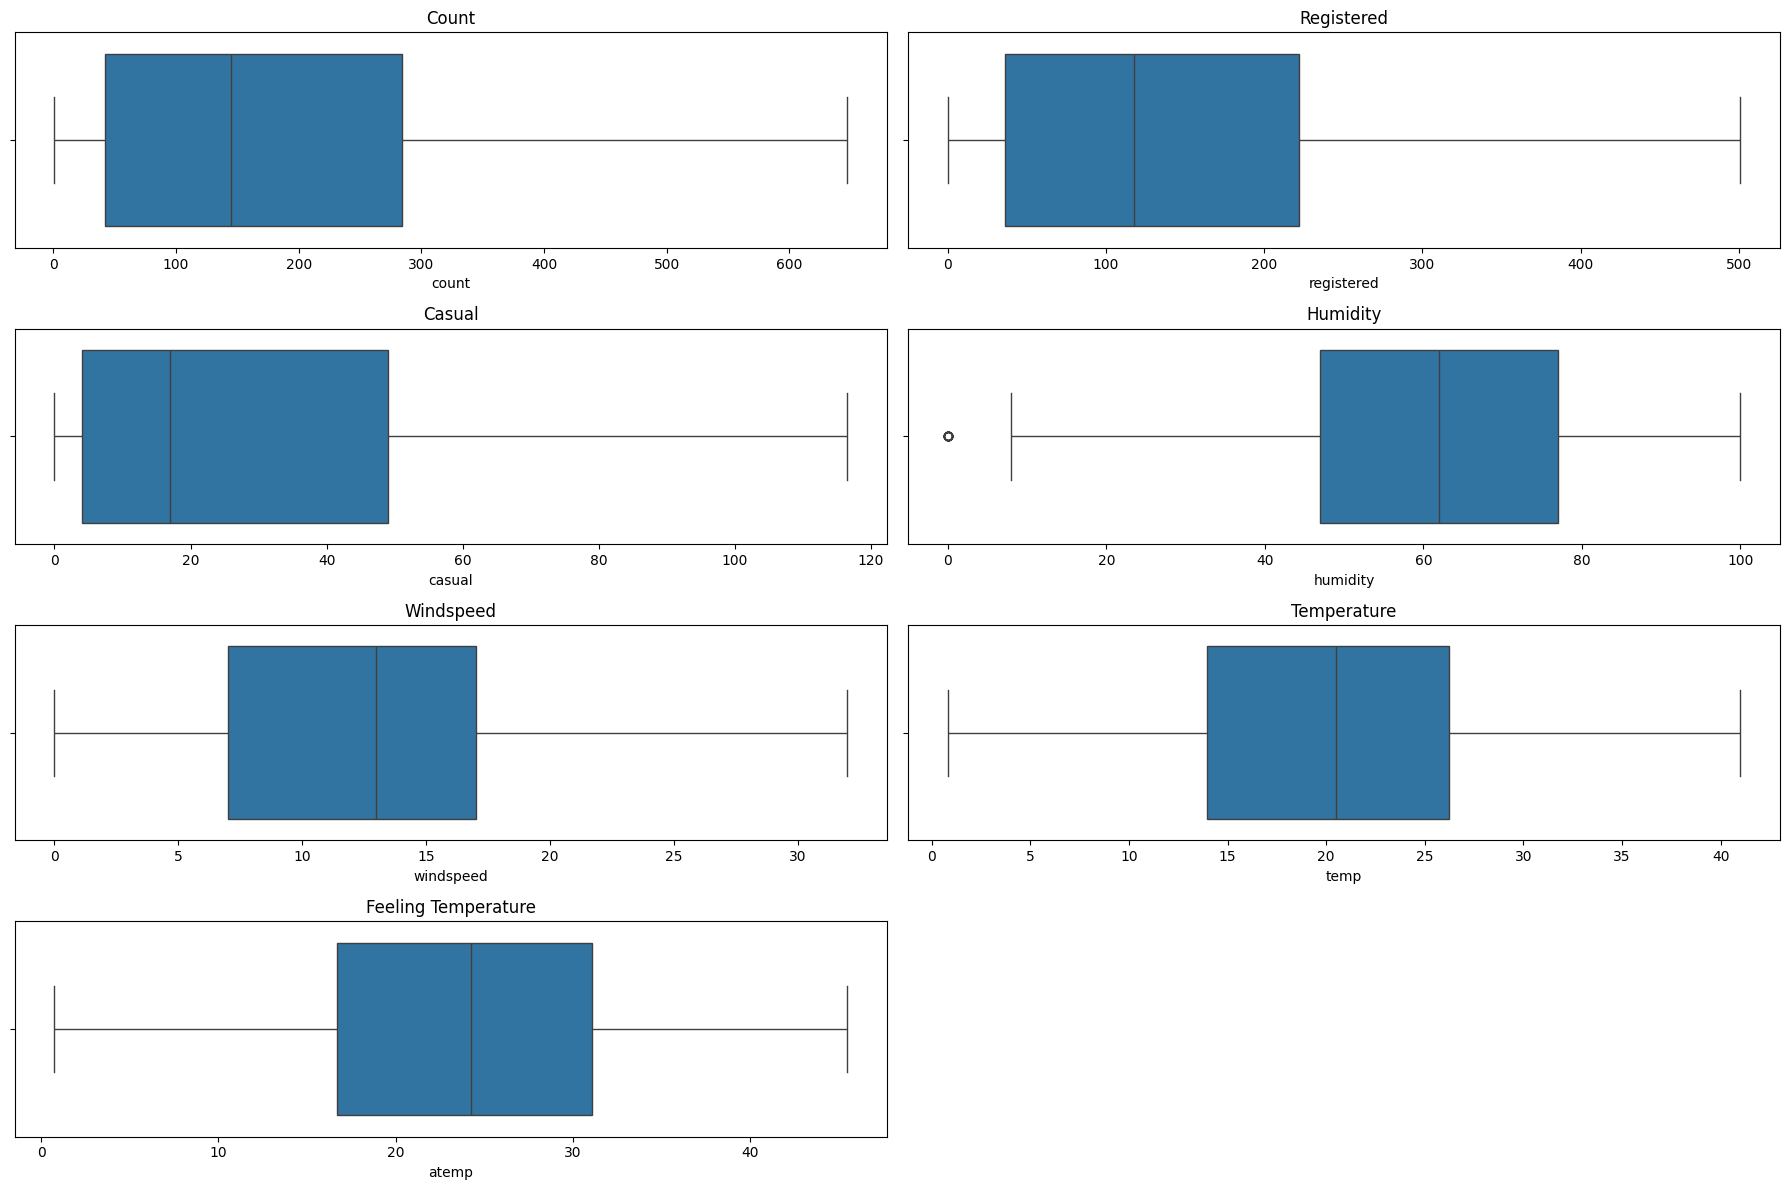

In [ ]:
plt.figure(figsize=(18, 12))

# Plot boxplot for 'count'
plt.subplot(4, 2, 1)
sns.boxplot(x=df['count'])
plt.title('Count')

# Plot boxplot for 'registered'
plt.subplot(4, 2, 2)
sns.boxplot(x=df['registered'])
plt.title('Registered')

# Plot boxplot for 'casual'
plt.subplot(4, 2, 3)
sns.boxplot(x=df['casual'])
plt.title('Casual')

# Plot boxplot for 'humidity'
plt.subplot(4, 2, 4)
sns.boxplot(x=df['humidity'])
plt.title('Humidity')

# Plot boxplot for 'windspeed'
plt.subplot(4, 2, 5)
sns.boxplot(x=df['windspeed'])
plt.title('Windspeed')

# Plot boxplot for 'temp'
plt.subplot(4, 2, 6)
sns.boxplot(x=df['temp'])
plt.title('Temperature')

# Plot boxplot for 'atemp'
plt.subplot(4, 2, 7)
sns.boxplot(x=df['atemp'])
plt.title('Feeling Temperature')

plt.tight_layout()
plt.show()


**Insights :**

There are outliers above the upper limit of the whisker in Count,Registered,Casual and Windspeed.

In [ ]:
def compute_bounds_IQR(data):# Function to compute the bounds using IQR
    Q1 = np.percentile(data, 25, interpolation='midpoint')
    Q3 = np.percentile(data, 75, interpolation='midpoint')
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

def clip_outliers(data):# Function to clip the data to the bounds
    lower_bound, upper_bound = compute_bounds_IQR(data)
    return np.clip(data, lower_bound, upper_bound)

# Clipping the specified columns
df['count'] = clip_outliers(df['count'])
df['registered'] = clip_outliers(df['registered'])
df['casual'] = clip_outliers(df['casual'])
df['windspeed'] = clip_outliers(df['windspeed'])

<ipython-input-64-d997d769b2c1>:10: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  lower_bound, upper_bound = compute_bounds_IQR(data)


In [ ]:
correlation = df.corr(numeric_only=True)

<Axes: >

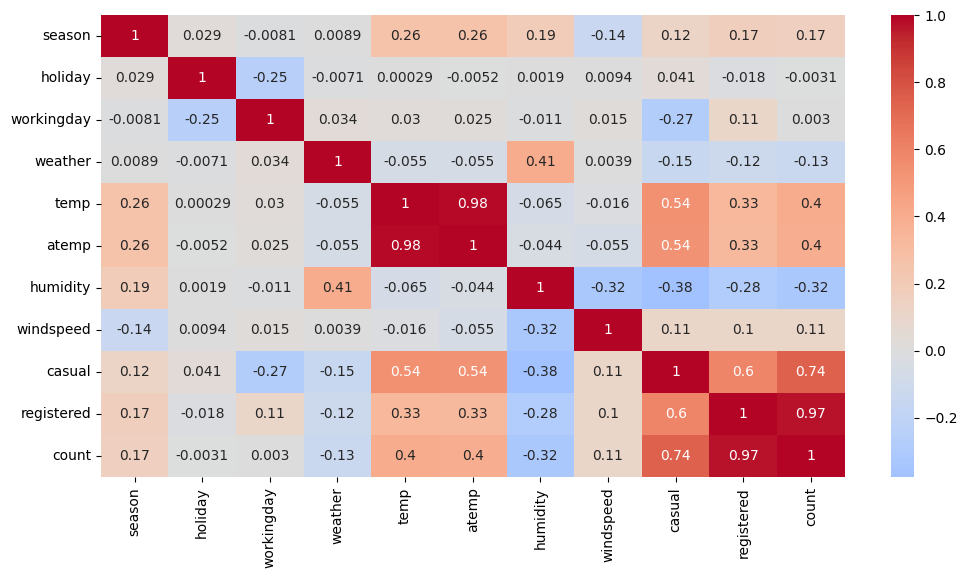

In [ ]:
plt.figure(figsize= (12,6))
sns.heatmap(correlation,annot=True,cmap='coolwarm',center=0)

# **Insights:**

**Temperature (temp and atemp):**

Both temperature (temp) and apparent temperature (atemp) have strong positive correlations with the total count (count), with correlation coefficients of 0.4.
temp and atemp are nearly perfectly correlated with each other (0.98).

**Humidity and Windspeed:**

Humidity has a weak negative correlation with the total count (count) at -0.32.
Windspeed has a very weak positive correlation with the total count (count) at 0.11.

**User Type:**

casual users have a moderate positive correlation with count (0.74).
registered users have a very strong positive correlation with count (0.97).

**Season and Weather:**

Season has a weak positive correlation with the total count (count) at 0.17.
Weather condition has a weak negative correlation with count at -0.13.

**Working Day and Holiday:**

Working days have a near-zero correlation with the total count (count) (0.003).
Holidays have a near-zero correlation with the total count (count) (-0.0031).

# **To Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?**

**Null Hypothesis (Ho):** There is no significant difference in the mean number of bike rides between weekdays and weekends.

**Alternative Hypothesis (Ha):** There is a significant difference in the mean number of bike rides between weekdays and weekends.

Since Working day and Weekend both are independed variables we can use Two sample T-test(Independent T-test) and let us consider alpha=5%.

In [ ]:
from scipy.stats import ttest_ind
import scipy.stats as stats

In [ ]:
weekdays = df[df['workingday'] == 0]['count']
weekend = df[df['workingday'] == 1]['count']

In [ ]:
t_stat, p_val = ttest_ind(weekdays, weekend)
print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: -0.3163260408231243
p-value: 0.7517611135576576


In [ ]:
if p_val < 0.05:
    print(f' Since {p_val} < 0.05 we reject the null hypothesis,There is significant difference in the mean number of bike rides between weekdays and weekends.')
else:
    print(f' Since {p_val} > 0.05 we Accept the null hypothesis,\n There is no significant difference in the mean number of bike rides between weekdays and weekends.')

 Since 0.7517611135576576 > 0.05 we Accept the null hypothesis,
 There is no significant difference in the mean number of bike rides between weekdays and weekends.


# **Inferences & Conclusion**

*   The p-value from the t-test was greater than the significance level (0.05), indicating that we fail to reject the null hypothesis. Therefore, the mean number of bike rides on weekdays is not statistically different from the mean number of bike rides on weekends.
*   The similar number of bike rides on both weekdays and weekends suggests consistent usage of the bike-sharing service throughout the week.


*   The lack of significant difference might imply that the bike-sharing service is used by a diverse range of people with varied schedules, such as commuters on weekdays and leisure users on weekends.


# **Recommendations**
**Weekday Promotions :** Introduce promotions targeting weekday commuters, such as discounts for regular use during rush hours.

**Weekend Campaigns :** Run campaigns promoting leisure and recreational use on weekends, possibly collaborating with local events or tourist attractions.

**Increase Bike Availability :** Ensure a sufficient number of bikes are available at popular locations both on weekdays and weekends to meet consistent demand.


**User Feedback and Surveys :**
Conduct surveys and collect user feedback to understand the specific needs and preferences of users on both weekdays and weekends. This can help in tailoring services and promotions.

**Expand Services in new Locations :**
Consider expanding to new locations that might have untapped potential, such as business locations for weekdays and parks or tourist areas for weekends.Promote the tourist areas or parks to commute in the bikes through social media.

# **Check if the demand of bicycles on rent is the same for different Weather conditions?**

To check if the demand for bicycles on rent is the same for different weather conditions, we can use the ANOVA test. Specifically, a **one-way ANOVA test** is appropriate when comparing the means of a continuous variable (demand for bicycles) across more than two groups (different weather conditions). Anova test is suitable only when the data follows Normal Distribution.

**Check whether the data follows the Normal Distribution or not by different tests**

**Checking the Normalization through Histogram**

In [ ]:
w={}
for i in df['weather'].unique():
    w[i] = df[df['weather'] == i]


In [ ]:
weather_1 = w[1]['count']
weather_2 = w[2]['count']
weather_3 = w[3]['count']
weather_4 = w[4]['count']

<Axes: xlabel='count', ylabel='Count'>

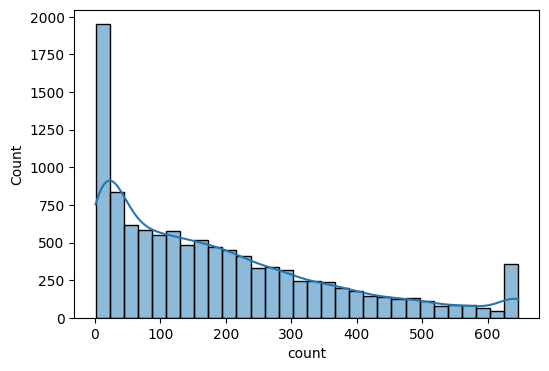

In [ ]:
plt.figure(figsize= (6,4))
sns.histplot(df['count'],kde=True)

**Insights :**
As per the hist plot we can observe that the shape of the distribution does not follow bellcurve.Hence it does not follow Normal Distribution.The data is right skewed.


**Checking the equality of Variance using Levene's Test**

In [ ]:
from scipy.stats import levene
levene_stat, p_value = levene(weather_1,weather_2,weather_3,weather_4)
print(f'Levene’s test statistic: {levene_stat}, p-value: {p_value}')

Levene’s test statistic: 59.78620431801216, p-value: 2.499984328437755e-38


In [ ]:
if p_value < 0.05:
    print(f'Since {p_value} < 0.05 we reject the null hypothesis of equal variances')
else:
    print(f'Since {p_value}>0.05 we Accept the null hypothesis of equal variances')

Since 2.499984328437755e-38 < 0.05 we reject the null hypothesis of equal variances


**Checking the Normalization using QQ Plot**

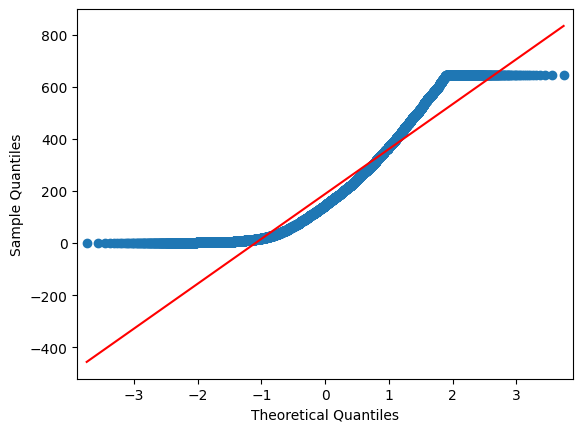

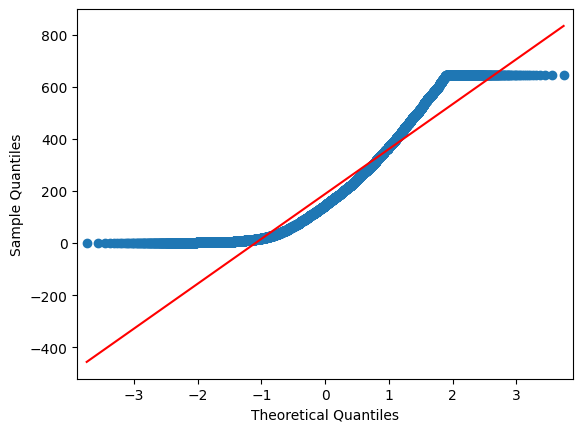

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df['count'],line='s')

# **Insights :**
We can observe that the datapoints does not coincide with the reference line which means our data does not follow Normal distribution.

# **Shapiro Test**

In [ ]:
print('Number of rows in weather_1 : ', weather_1.shape[0])
print('Number of rows in weather_2 : ', weather_2.shape[0])
print('Number of rows in weather_3 : ',weather_3.shape[0])
print('Number of rows in weather_4 : ',weather_4.shape[0])
print('Number of rows in the dataframe : ',df['count'].shape[0])

Number of rows in weather_1 :  7192
Number of rows in weather_2 :  2834
Number of rows in weather_3 :  859
Number of rows in weather_4 :  1
Number of rows in the dataframe :  10886


**Shapiro Test** is suitable only when the sample size is in between 50 to 200.But Our dataset contains more than 200 rows.Therefore,Our p-value may not be accurate.

In [ ]:
shapiro_stat, p_value = stats.shapiro(df['count'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
shapiro_stat, p_value

(0.8877866268157959, 0.0)

Given that the count data does not follow a normal distribution and that the variances are not equal across the different weather conditions, we should consider using non-parametric tests such as
**Kruskal-Wallis H test**.It is a non-parametric alternative to one-way ANOVA. It is used to determine if there are statistically significant differences between the medians of three or more independent groups.

# **Kruskal-Wallis H Test**

In [ ]:
kruskal_stat, p_value = stats.kruskal(weather_1, weather_2, weather_3, weather_4)

In [ ]:
if p_value < 0.05:
    print("Reject the null hypothesis\nThere is a significant difference in the median demand for bicycles across different weather conditions.")
else:
    print("Fail to reject the null hypothesis\nThere is no significant difference in the median demand for bicycles across different weather conditions.")

Reject the null hypothesis
There is a significant difference in the median demand for bicycles across different weather conditions.


# **Conclusion :**
There is a significant difference in the demand for bicycles across different weather conditions.

# **Recommendations :**
**Adjust Inventory Based on Weather Conditions :**
*   Since demand is likely higher on clear days (weather condition 1), ensure that more bicycles are available. This can be achieved by redistributing bikes from areas with lower demand or renting additional bicycles.
*   On days with bad weather conditions (e.g., heavy rain, snow), reduce the number of available bicycles to match the lower demand. This helps in managing operational costs.

**Marketing and Promotions :**
*   Create targeted marketing campaigns that focus on the expected high-demand days. Use social media and app notifications to inform potential customers about the availability and special offers.
*   Offer weather-based promotions, such as discounts for pre-booking on forecasted sunny days or special deals for rentals on misty or slightly cloudy days.

**Infrastructure :**
Ensure that rental stations are weather-proof, providing shelters for bikes and customers during adverse weather conditions.

**Safety and Maintenance :**


*   Emphasize safety during adverse weather conditions. Provide safety guidelines to customers and ensure that bikes are well-maintained to handle different weather scenarios.
*   Schedule regular maintenance checks, especially after days with severe weather conditions, to ensure that all bicycles are in safe and working condition for subsequent rentals.



# **Check if the demand of bicycles on rent is the same for different Seasons?**

To check if the demand for bicycles on rent is the same for different seasons, we can use the ANOVA test. Specifically, a **one-way ANOVA test** is appropriate when comparing the means of a continuous variable (demand for bicycles) across more than two groups (different seasons). Anova test is suitable only when the data follows Normal Distribution.

**Check whether the data follows the Normal Distribution or not by different tests**

**Step-1 : Checking the Normalization through Histogram and QQ PLOT**

In the above test for demand of bicycles for different weather conditions we observed that count field is not normally distributed or it does not follow the normal distribution.

**Step-2 : Checking the equality of Variance using Levene's Test**

In [ ]:
s={}
for i in df['season'].unique():
    s[i] = df[df['season'] == i]


In [ ]:
df['season'].unique()

array([1, 2, 3, 4])

In [ ]:
season_1 = s[1]['count']
season_2 = s[2]['count']
season_3 = s[3]['count']
season_4 = s[4]['count']

In [ ]:
levene_stat, p_value = levene(season_1,season_2,season_3,season_4)
print(f'Levene’s test statistic: {levene_stat}, p-value: {p_value}')

Levene’s test statistic: 199.5119672794296, p-value: 5.7233179707619984e-126


In [ ]:
if p_value < 0.05:
    print(f'Since {p_value} < 0.05 we reject the null hypothesis of equal variances')
else:
    print(f'Since {p_value}>0.05 we Accept the null hypothesis of equal variances')

Since 5.7233179707619984e-126 < 0.05 we reject the null hypothesis of equal variances


Given that the count data does not follow a normal distribution and that the variances are not equal across the different seasons, we should consider using non-parametric tests such as
**Kruskal-Wallis H test**.It is a non-parametric alternative to one-way ANOVA. It is used to determine if there are statistically significant differences between the medians of three or more independent groups.

# **Kruskal-Wallis H Test**

In [ ]:
kruskal_stat, p_value = stats.kruskal(season_1,season_2,season_3,season_4)

In [ ]:
if p_value < 0.05:
    print("Reject the null hypothesis\nThere is a significant difference in the median demand for bicycles across different Seasons.")
else:
    print("Fail to reject the null hypothesis\nThere is no significant difference in the median demand for bicycles across different Seasons.")

Reject the null hypothesis
There is a significant difference in the median demand for bicycles across different Seasons.


In [ ]:
print(season_1.median())
print(season_2.median())
print(season_3.median())
print(season_4.median())

78.0
172.0
195.0
161.0


# **Inferences and Conclusions :**

*   The demand for bicycles varies significantly with the seasons. Certain seasons, likely spring and summer(season_3), show higher median demand due to more favorable weather conditions, while fall and winter show lower demand.
*  The significant seasonal variation in demand implies that the business needs to adjust its operations and strategies to cater to the fluctuating demand effectively.

# **Recommendations :**

**Seasonal Inventory Adjustments :**

Increase the number of available bicycles during high-demand seasons (season_3) to meet customer needs. Conversely, reduce the inventory during low-demand seasons (season_1) to save on maintenance and storage costs.

**Flexible Inventory :**

Implement a flexible inventory system that allows for quick adjustments based on short-term weather forecasts.

**Off-Season Discounts:**

Offer discounts during off-peak seasons (fall and winter) to attract more customers and maintain a steady flow of rentals.

**Seasonal Campaigns:**

Develop targeted marketing campaigns to promote bicycle rentals during peak seasons. Highlight the advantages of biking in good weather and the scenic beauty of the season.

**Off-Season Promotions :**

Create special offers and promotions to boost rentals during the off-season. For example, offer bundled packages with other local attractions or services to make bike rentals more appealing.

# **check if the Weather conditions are significantly different during different Seasons?**

Since weather conditions and seasons are categorical variables, we can use a **chi-square** test of independence to compare the distributions of weather conditions across the seasons.

**Chi-Square Test of Independence :**

The chi-square test of independence evaluates whether two categorical variables are independent or if there is an association between them.

Contingency table to compare observed frequencies (the actual counts in the data) to expected frequencies (the counts that would be expected if there were no association between the variables).

In [ ]:
contingency_table = pd.crosstab(index=df['season'], columns=df['weather'])
contingency_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
chi2_stat, p_value, dof, expected

(49.158655596893624,
 1.549925073686492e-07,
 9,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

In [ ]:
if p_value < 0.05:
    print("Reject the null hypothesis\nThere is a significant association between weather conditions and seasons.")
else:
    print("Fail to reject the null hypothesis\nThere is no significant association between weather conditions and seasons.")

Reject the null hypothesis
There is a significant association between weather conditions and seasons.


# **Conclusions :**

**Seasonal Variations in Weather:**

Weather conditions vary significantly across different seasons. This means that certain weather conditions are more prevalent in some seasons than others. For example, you might find more clear and sunny days in summer and more rainy or snowy days in winter.

**Impact on Bicycle Demand :**

Since weather conditions directly affect bicycle demand, the seasonal variation in weather implies that bicycle demand will also fluctuate with the seasons. Clear weather usually leads to higher bicycle rentals, while adverse weather conditions (rain, snow) typically result in lower rentals.

# **Recommendations**

**Inventory Management :**


*   Increase the number of available bicycles during seasons with more favorable weather conditions (e.g., spring and summer).
*   Conversely, reduce the inventory during seasons with adverse weather conditions (e.g., winter) to optimize maintenance and storage costs.Implement a flexible inventory system that can respond to short-term weather forecasts.

**Discounts in Low-Demand Seasons :**

Offer discounts during seasons with adverse weather conditions to attract customers and maintain a steady flow of rentals.

**Seasonal Campaigns :**

Create marketing campaigns that target high-demand seasons. Highlight the favorable weather and promote outdoor activities that involve bicycle rentals.

**Maintenance Scheduling :**

Schedule major maintenance activities during low-demand seasons to ensure that the maximum number of bicycles is available during peak seasons.